<a href="https://colab.research.google.com/github/mokselb/AD/blob/main/lab2(PCA_%2B_tSNE_%2B_k_Means_%2B_NLTK).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df = pd.read_csv("breast-cancer.csv")
df.drop('id', axis=1, inplace = True)
df.rename(columns={'diagnosis' : 'target'}, inplace = True)
df.head()

target  radius_mean  texture_mean  perimeter_mean  area_mean  \
0       1        17.99         10.38          122.80     1001.0   
1       1        20.57         17.77          132.90     1326.0   
2       1        19.69         21.25          130.00     1203.0   
3       1        11.42         20.38           77.58      386.1   
4       1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

–í –ø–µ—Ä—à—ñ–π –ª–∞–±—ñ —è –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–≤ –≤—Ä—É—á–Ω—É –º—ñ–Ω-–º–∞–∫—Å —Å–∫–µ–π–ª—ñ–Ω–≥, —Ü—å–æ–≥–æ —Ä–∞–∑—É—Å–∫–æ—Ä–∏—Å—Ç–∞—é—Å—å –≤–∂–µ –≥–æ—Ç–æ–≤–∏–º —Å–∫–µ–π–ª–µ—Ä–æ–º

In [ ]:
scaler = StandardScaler()
X = df.drop('target', axis = 1)
y = df['target']
scaled_X = scaler.fit_transform(X)

–¢–µ–ø–µ—Ä –∑–º—ñ–Ω–µ–º–æ —Ä–æ–∑–º—ñ—Ä–Ω—ñ—Å—Ç—å –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω–∏—Ö

In [ ]:
scaled_X.shape

(569, 30)

–Ø–∫ –±–∞—á–∏–º–æ, –∑–∞—Ä–∞–∑ –Ω–∞—à–∞ —Ä–æ–∑–º—ñ—Ä–Ω—ñ—Å—Ç—å 30, –∑–∞—Å—Ç–æ—Å—É—î–º–æ PCA —â–æ–± –æ—Ç—Ä–∏–º–∞—Ç–∏ 2

In [ ]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(scaled_X)
X_pca.shape

(569, 2)

In [ ]:
X_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

–ü–æ–∫–∞–∂–µ–º–æ –Ω–∞—à—ñ –¥–∞–Ω—ñ –Ω–∞ –≥—Ä–∞—Ñ—ñ–∫—É

Text(0, 0.5, 'Second component')

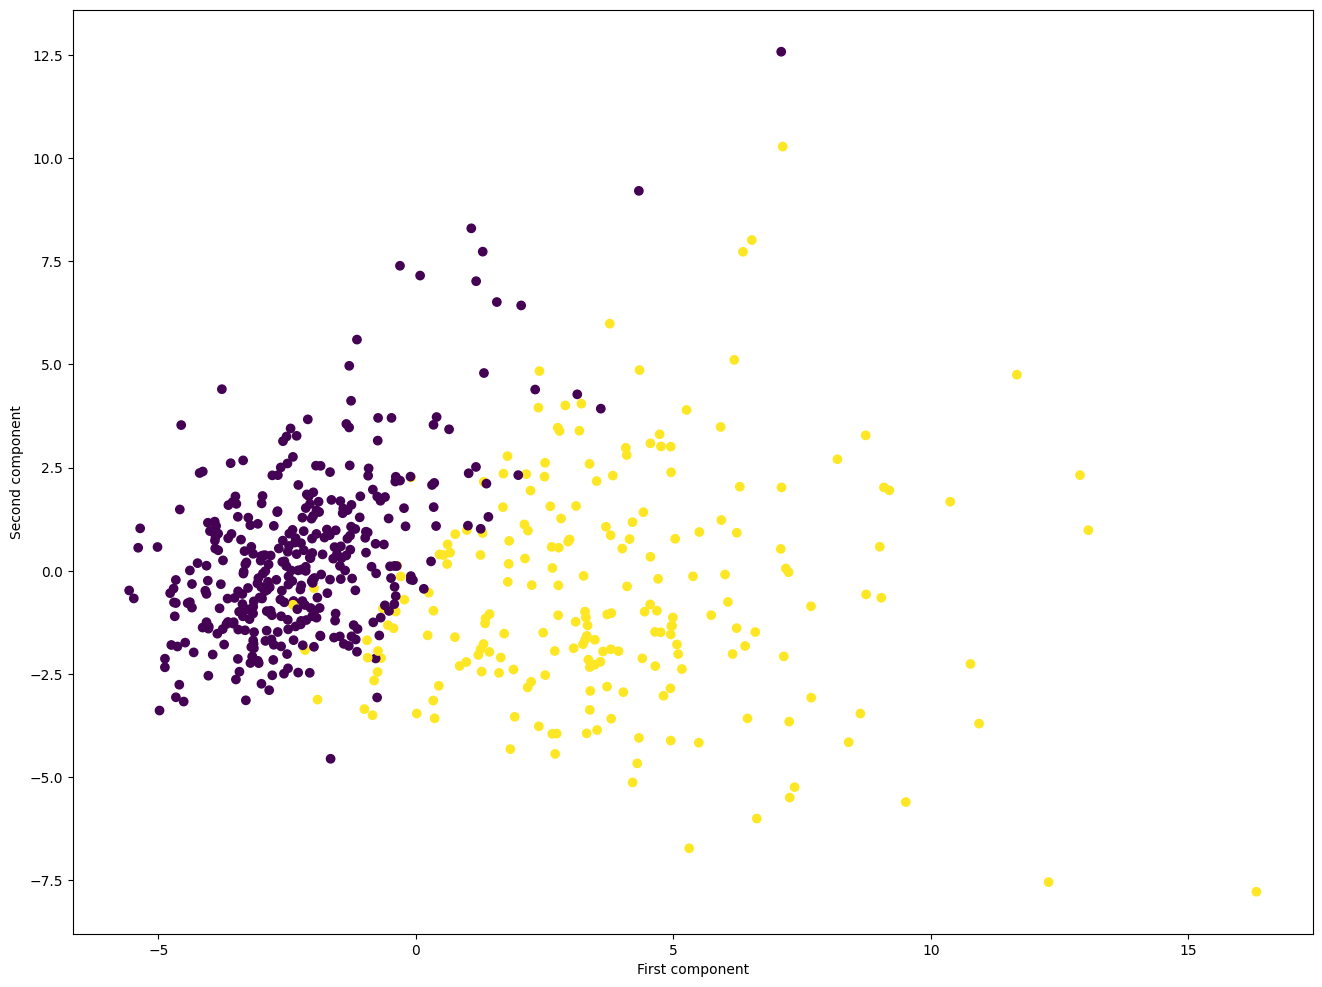

In [ ]:
plt.figure(figsize=(16,12))
plt.scatter(X_pca[:,0],X_pca[:,1],c = y)
plt.xlabel('First component')
plt.ylabel('Second component')

–¢–µ–ø–µ—Ä —Å–∫–æ—Ä–∏—Å—Ç–∞—î–º–æ—Å—è TSNE

In [ ]:
tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(scaled_X)
X_tsne.shape

(569, 2)

In [ ]:
X_tsne

array([[ 33.27749  ,  -3.6246672],
       [ 20.427671 , -11.771338 ],
       [ 29.528013 ,  -5.810834 ],
       ...,
       [ 13.44051  ,  -9.823674 ],
       [ 31.902275 ,  -1.9255751],
       [-26.698229 ,  -1.9333501]], dtype=float32)

Text(0, 0.5, 'tsne_2')

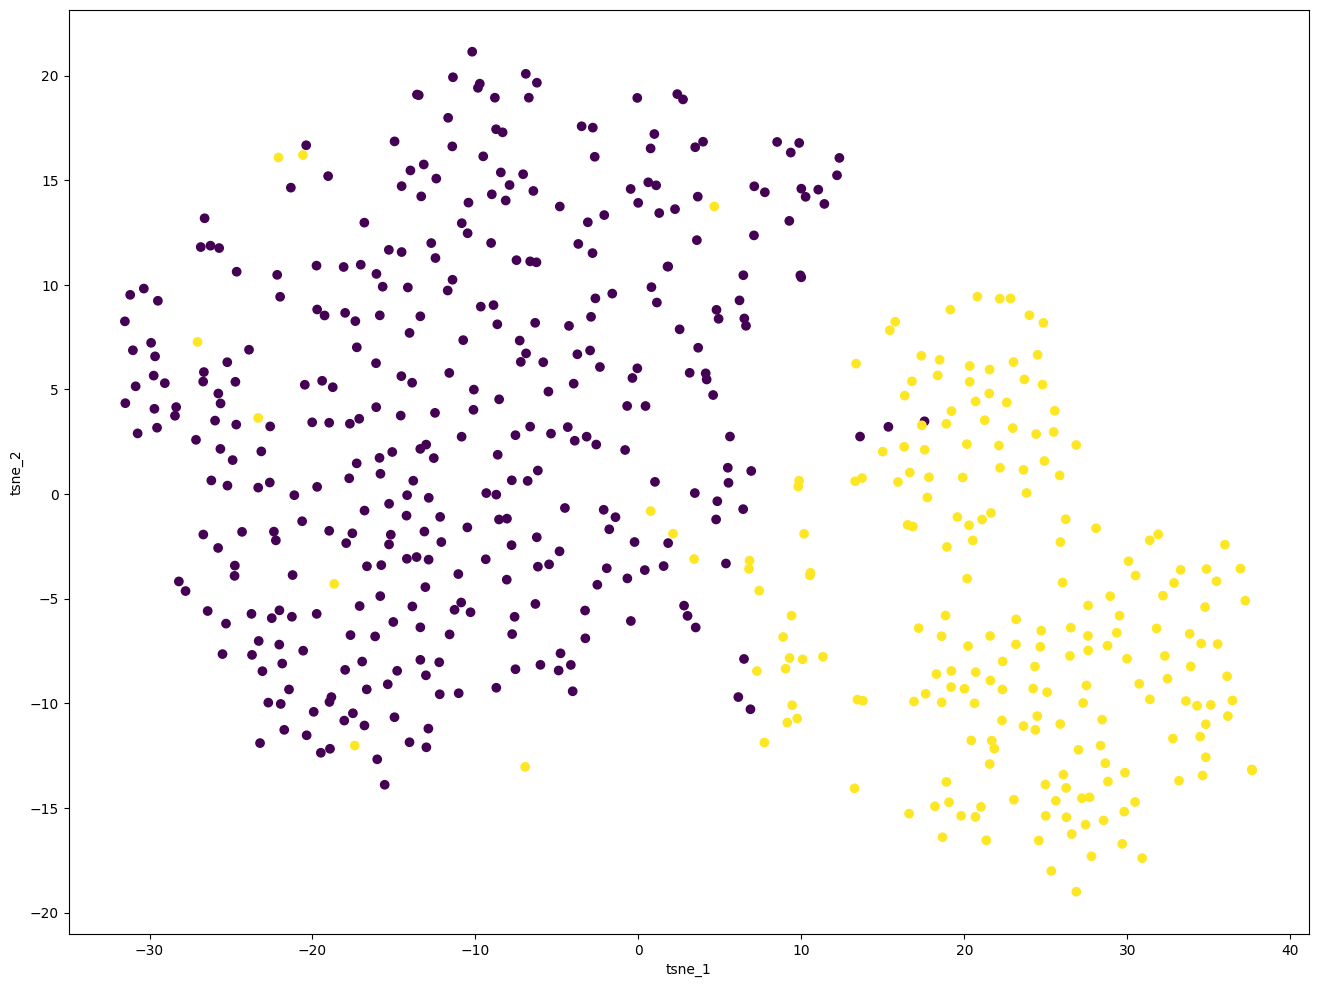

In [ ]:
plt.figure(figsize=(16,12))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c = y)
plt.xlabel('tsne_1')
plt.ylabel('tsne_2')

–ü–µ—Ä–µ–π–¥–µ–º–æ –¥–æ –∑–∞–≤–¥–∞–Ω–Ω—è –∫–≤–∞–Ω—Ç—É–≤–∞–Ω–Ω—è –∑–æ–±—Ä–∞–∂–µ–Ω–Ω—è

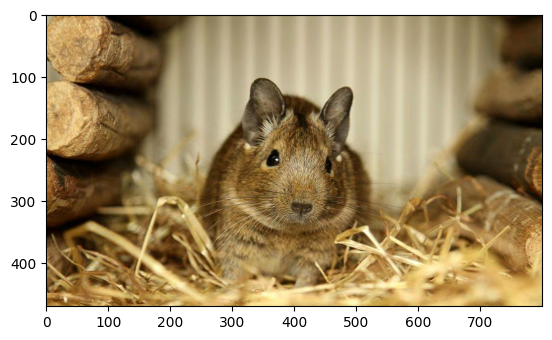

In [34]:
degu = mpl.image.imread('degu.jpg')
plt.imshow(degu)

In [36]:
degu.shape

(470, 800, 3)

In [37]:
X = degu.reshape(-1,3)
X.shape

(376000, 3)

–ì–ª–∏–±–∏–Ω–∞ 64:

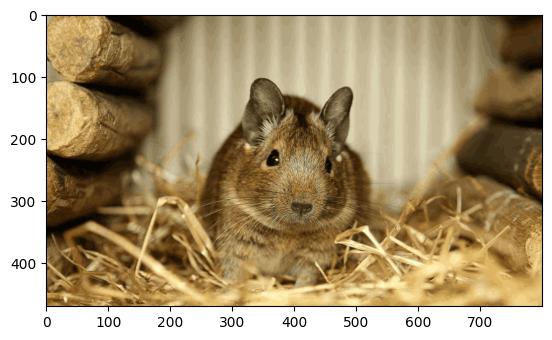

In [39]:
kmeans = KMeans(n_clusters = 64, n_init = 'auto')
kmeans.fit(X)
quan_img_64 = kmeans.cluster_centers_[kmeans.labels_]
quan_img_64 = quan_img_64.reshape(degu.shape)
plt.imshow(quan_img_64 / 255)

–í–∂–µ –∑–∞—Ä–∞–∑ –º–æ–∂–Ω–∞ –ø–æ–±–∞—á–∏—Ç–∏ –≤—Ç—Ä–∞—Ç—É –∫–æ–ª—å–æ—Ä—ñ–≤ —è–∫—â–æ –ø–æ–¥–∏–≤–∏—Ç–∏—Å—è –Ω–∞ –ª—ñ–≤—É –¥–µ—Ä–µ–≤'—è—à–∫—É

–¢–µ–ø–µ—Ä –≥–ª–∏–±–∏–Ω–∞ 32

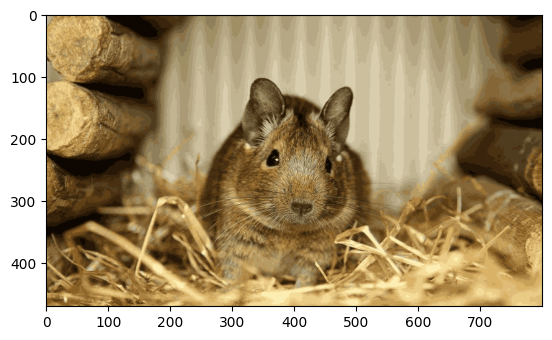

In [40]:
kmeans = KMeans(n_clusters = 32, n_init = 'auto')
kmeans.fit(X)
quan_img_32 = kmeans.cluster_centers_[kmeans.labels_]
quan_img_32 = quan_img_32.reshape(degu.shape)
plt.imshow(quan_img_32 / 255)

–¢—É—Ç –≤–∂–µ –º–æ–∂–Ω–∞ –ø–æ–±–∞—á–∏—Ç–∏ –≤—Ç—Ä–∞—Ç—É –Ω–∞—Å–∏—á–µ–Ω–æ—Å—Ç—ñ —Ö—É—Ç—Ä–∞ –±—ñ–ª–æ—á–∫–∏ —Ç–∞ –ø–ª–∞–≤–∞–Ω–Ω—è –∑–∞–¥–Ω—å–æ–≥–æ —Ñ–æ–Ω—É

–¢–µ–ø–µ—Ä –≥–ª–∏–±–∏–Ω–∞ 16

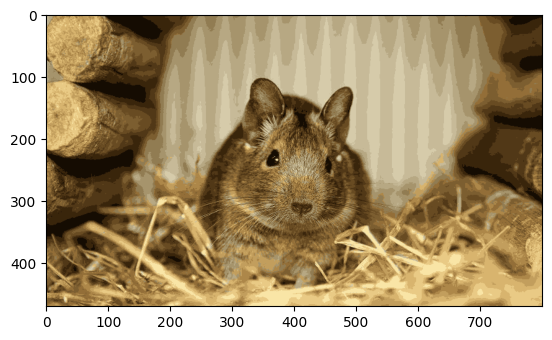

In [41]:
kmeans = KMeans(n_clusters = 16, n_init = 'auto')
kmeans.fit(X)
quan_img_16 = kmeans.cluster_centers_[kmeans.labels_]
quan_img_16 = quan_img_16.reshape(degu.shape)
plt.imshow(quan_img_16 / 255)

–ó–∞–¥–Ω—ñ–π —Ñ–æ–Ω –≤—Ç—Ä–∞—Ç–∏–≤ —â–µ –±—ñ–ª—å—à–µ –∫–æ–ª—å–æ—Ä—ñ–≤, –±—ñ–ª–æ—á–∫–∞ —Å—Ç–∞—î —Å—ñ—Ä—ñ—à–æ—é, –¥–µ—Ä–µ–≤'—è—à–∫–∏ —Ç–µ–∂ –ø–ª–∏–≤—É—Ç—å

–¢–µ–ø–µ—Ä 8

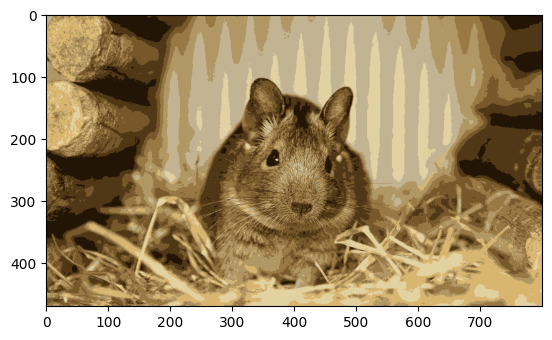

In [42]:
kmeans = KMeans(n_clusters = 8, n_init = 'auto')
kmeans.fit(X)
quan_img_8 = kmeans.cluster_centers_[kmeans.labels_]
quan_img_8 = quan_img_8.reshape(degu.shape)
plt.imshow(quan_img_8 / 255)

–Ø–∫ –±–∞—á–∏–º–æ, –±–∞–≥–∞—Ç–æ –æ–±'—î–∫—Ç—ñ–≤ –≤–∂–µ –≤—Ç—Ä–∞—Ç–∏–ª–∏ —Å–≤—ñ–π —Ä–µ–ª—å—î—Ñ, –∞–ª–µ –±—ñ–ª–æ—á–∫—É –¥–æ—Å—ñ –¥–æ—Å—ñ –º–æ–∂–Ω–∞ –∑—Ä–æ–∑—É–º—ñ—Ç–∏ –ø–æ–≤–Ω–æ—Ü—ñ–Ω–Ω–æ

–ü–µ—Ä–µ–π–¥–µ–º–æ –¥–æ –æ–±—Ä–æ–±–∫–∏ —Ç–∞ –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó —Ç–µ–∫—Å—Ç–æ–≤–∏–π –¥–∞–Ω–Ω–∏—Ö

In [140]:
text = pd.read_csv('Mental Health Dataset.csv')

In [141]:
text.head

<bound method NDFrame.head of                                                    posts      predicted  \
0      I know as parent of child with down syndrome t...       negative   
1      but in my heart I know this is the future prom...        neutral   
2      I have mylefibrosis which turn to leukemia the...       negative   
3      from one of my health group subject wayne dyer...        neutral   
4      gmos now link to leukemia http nsnbc I 2013 07...        neutral   
...                                                  ...            ...   
10387  hey everyone I am a 25 year old male I work ou...       negative   
10388  have surgery for stage 1 colon cancer 1 year a...  very negative   
10389  the doctor advise we he could not remove the a...        neutral   
10390  my 66 year old father have been through so muc...        neutral   
10391  I have bein have a bloody stool since last yea...       negative   

       intensity  
0             -1  
1              0  
2           

In [142]:
text.shape

(10392, 3)

–ó–∞–ª–∏—à–∏–º–æ –ª–∏—à–µ —Ç–µ–∫—Å—Ç —Ç–∞ —Å–∞–º—É –æ—Ü—ñ–Ω–∫—É –≤—ñ–¥ -2 –¥–æ 1

In [143]:
text.drop('predicted', axis = 1, inplace = True)
text.shape

(10392, 2)

In [144]:
text.head

<bound method NDFrame.head of                                                    posts  intensity
0      I know as parent of child with down syndrome t...         -1
1      but in my heart I know this is the future prom...          0
2      I have mylefibrosis which turn to leukemia the...         -1
3      from one of my health group subject wayne dyer...          0
4      gmos now link to leukemia http nsnbc I 2013 07...          0
...                                                  ...        ...
10387  hey everyone I am a 25 year old male I work ou...         -1
10388  have surgery for stage 1 colon cancer 1 year a...         -2
10389  the doctor advise we he could not remove the a...          0
10390  my 66 year old father have been through so muc...          0
10391  I have bein have a bloody stool since last yea...         -1

[10392 rows x 2 columns]>

–î–ª—è –∑—Ä—É—á–Ω–æ—Å—Ç—ñ –≤—ñ–¥—Ä–∞–∑—É –ø—Ä–µ–π–º–µ–Ω—É—î–º–æ –æ—Ü—ñ–Ω–∫—É –≤ —Ç–∞—Ä–≥–µ—Ç

In [145]:
text.rename(columns ={'intensity' : 'target'}, inplace = True)
text.head

<bound method NDFrame.head of                                                    posts  target
0      I know as parent of child with down syndrome t...      -1
1      but in my heart I know this is the future prom...       0
2      I have mylefibrosis which turn to leukemia the...      -1
3      from one of my health group subject wayne dyer...       0
4      gmos now link to leukemia http nsnbc I 2013 07...       0
...                                                  ...     ...
10387  hey everyone I am a 25 year old male I work ou...      -1
10388  have surgery for stage 1 colon cancer 1 year a...      -2
10389  the doctor advise we he could not remove the a...       0
10390  my 66 year old father have been through so muc...       0
10391  I have bein have a bloody stool since last yea...      -1

[10392 rows x 2 columns]>

–ü–µ—Ä–µ–¥ —Ç–∏–º —è–∫ –≤–∏–¥–∞–ª—è—Ç–∏ –∑–∞–π–≤—ñ —Å–∏–º–≤–æ–ª–∏ —Ç–∞ –ø—É–Ω–∫—Ç—É–∞—Ü—ñ—é, –≤–∏–¥–∞–ª–∏–º–æ –≤—Å—ñ –ø–æ—Å–∏–ª–∞–Ω–Ω—è, –∑–≥–∞–¥—É–≤–∞–Ω–Ω—è —Ç–∞ —Ö–µ—à—Ç–µ–≥–∏

In [146]:
text['posts'] = text['posts'].astype(str)
text['posts'] = text['posts'].apply(lambda x: re.sub(r'https?://\S+', '', x))
text['posts'] = text['posts'].apply(lambda x: re.sub(r'[@#]\S+', '', x))
text.head

<bound method NDFrame.head of                                                    posts  target
0      I know as parent of child with down syndrome t...      -1
1      but in my heart I know this is the future prom...       0
2      I have mylefibrosis which turn to leukemia the...      -1
3      from one of my health group subject wayne dyer...       0
4      gmos now link to leukemia http nsnbc I 2013 07...       0
...                                                  ...     ...
10387  hey everyone I am a 25 year old male I work ou...      -1
10388  have surgery for stage 1 colon cancer 1 year a...      -2
10389  the doctor advise we he could not remove the a...       0
10390  my 66 year old father have been through so muc...       0
10391  I have bein have a bloody stool since last yea...      -1

[10392 rows x 2 columns]>

–ó–≤–µ–¥–µ–º–æ –≤—Å–µ –¥–æ –º–∞–ª–µ–Ω—å–∫–∏—Ö –ª—ñ—Ç–µ—Ä

In [147]:
text['posts'] = text['posts'].str.lower()
text.head

<bound method NDFrame.head of                                                    posts  target
0      i know as parent of child with down syndrome t...      -1
1      but in my heart i know this is the future prom...       0
2      i have mylefibrosis which turn to leukemia the...      -1
3      from one of my health group subject wayne dyer...       0
4      gmos now link to leukemia http nsnbc i 2013 07...       0
...                                                  ...     ...
10387  hey everyone i am a 25 year old male i work ou...      -1
10388  have surgery for stage 1 colon cancer 1 year a...      -2
10389  the doctor advise we he could not remove the a...       0
10390  my 66 year old father have been through so muc...       0
10391  i have bein have a bloody stool since last yea...      -1

[10392 rows x 2 columns]>

–¢–µ–ø–µ—Ä –≤–∏–¥–∞–ª–∏–º–æ –≤—Å—é –ø—É–Ω–∫—Ç—É–∞—Ü—ñ—é

In [148]:
text['posts'] = text['posts'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
text.head

<bound method NDFrame.head of                                                    posts  target
0      i know as parent of child with down syndrome t...      -1
1      but in my heart i know this is the future prom...       0
2      i have mylefibrosis which turn to leukemia the...      -1
3      from one of my health group subject wayne dyer...       0
4      gmos now link to leukemia http nsnbc i 2013 07...       0
...                                                  ...     ...
10387  hey everyone i am a 25 year old male i work ou...      -1
10388  have surgery for stage 1 colon cancer 1 year a...      -2
10389  the doctor advise we he could not remove the a...       0
10390  my 66 year old father have been through so muc...       0
10391  i have bein have a bloody stool since last yea...      -1

[10392 rows x 2 columns]>

–¢–µ–ø–µ—Ä —Ü–∏—Ñ—Ä–∏

In [149]:
text['posts'] = text['posts'].apply(lambda x: re.sub(r'\d', '', x))
text.head

<bound method NDFrame.head of                                                    posts  target
0      i know as parent of child with down syndrome t...      -1
1      but in my heart i know this is the future prom...       0
2      i have mylefibrosis which turn to leukemia the...      -1
3      from one of my health group subject wayne dyer...       0
4      gmos now link to leukemia http nsnbc i    gmo ...       0
...                                                  ...     ...
10387  hey everyone i am a  year old male i work out ...      -1
10388  have surgery for stage  colon cancer  year ago...      -2
10389  the doctor advise we he could not remove the a...       0
10390  my  year old father have been through so much ...       0
10391  i have bein have a bloody stool since last yea...      -1

[10392 rows x 2 columns]>

–ü—Ä–∏–±–∏—Ä–∞—î–º–æ –∑–∞–π–≤—ñ –ø—Ä–æ–±—ñ–ª–∏

In [150]:
text['posts'] = text['posts'].apply(lambda x: re.sub(r'\s{2,}', ' ', x))
text.head

<bound method NDFrame.head of                                                    posts  target
0      i know as parent of child with down syndrome t...      -1
1      but in my heart i know this is the future prom...       0
2      i have mylefibrosis which turn to leukemia the...      -1
3      from one of my health group subject wayne dyer...       0
4      gmos now link to leukemia http nsnbc i gmo now...       0
...                                                  ...     ...
10387  hey everyone i am a year old male i work out e...      -1
10388  have surgery for stage colon cancer year ago m...      -2
10389  the doctor advise we he could not remove the a...       0
10390  my year old father have been through so much i...       0
10391  i have bein have a bloody stool since last yea...      -1

[10392 rows x 2 columns]>

–ü–µ—Ä–µ–π–¥–µ–º–æ –¥–æ —Å—Ç–æ–ø-—Å–ª—ñ–≤

In [151]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [152]:
stop_words = stopwords.words('english')
text['posts'] = text['posts'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
text.head

<bound method NDFrame.head of                                                    posts  target
0      know parent child syndrome hear child high ris...      -1
1      heart know future promise article regardless h...       0
2      mylefibrosis turn leukemia want stem cell tran...      -1
3      one health group subject wayne dyer leukemia c...       0
4      gmos link leukemia http nsnbc gmo link leukemi...       0
...                                                  ...     ...
10387  hey everyone year old male work eat pretty hea...      -1
10388  surgery stage colon cancer year ago cea level ...      -2
10389  doctor advise could remove abnormal polyp chri...       0
10390  year old father much past year really need try...       0
10391  bein bloody stool since last year start around...      -1

[10392 rows x 2 columns]>

–¢–µ–ø–µ—Ä –Ω–µ–æ–±—Ö—ñ–¥–Ω–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ —Å—Ç–µ–º—ñ–Ω–≥ —Ç–∞ –ª–µ–º–∞—Ç–∏–∑–∞—Ü—ñ—é

In [153]:
porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

–ê–ª–µ –ø–µ—Ä–µ–¥ —Ü–∏–º –∑—Ä–æ–±–∏–º–æ —â–µ —Ç–æ–∫–µ–Ω—ñ–∑–∞—Ü—ñ—é

In [154]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

–ë–µ–∑ —Ü—å–æ–≥–æ –≤–æ–Ω–æ –Ω–µ —Ö–æ—Ç—ñ–ª–æ –ø—Ä–∞—Ü—é–≤–∞—Ç–∏ üò•

In [155]:
text['posts'] = text['posts'].apply(lambda x: word_tokenize(x))
text.head

<bound method NDFrame.head of                                                    posts  target
0      [know, parent, child, syndrome, hear, child, h...      -1
1      [heart, know, future, promise, article, regard...       0
2      [mylefibrosis, turn, leukemia, want, stem, cel...      -1
3      [one, health, group, subject, wayne, dyer, leu...       0
4      [gmos, link, leukemia, http, nsnbc, gmo, link,...       0
...                                                  ...     ...
10387  [hey, everyone, year, old, male, work, eat, pr...      -1
10388  [surgery, stage, colon, cancer, year, ago, cea...      -2
10389  [doctor, advise, could, remove, abnormal, poly...       0
10390  [year, old, father, much, past, year, really, ...       0
10391  [bein, bloody, stool, since, last, year, start...      -1

[10392 rows x 2 columns]>

In [156]:
text['posts'] = text['posts'].apply(lambda tokens: [porter_stemmer.stem(token) for token in tokens])
text.head

<bound method NDFrame.head of                                                    posts  target
0      [know, parent, child, syndrom, hear, child, hi...      -1
1      [heart, know, futur, promis, articl, regardles...       0
2      [mylefibrosi, turn, leukemia, want, stem, cell...      -1
3      [one, health, group, subject, wayn, dyer, leuk...       0
4      [gmo, link, leukemia, http, nsnbc, gmo, link, ...       0
...                                                  ...     ...
10387  [hey, everyon, year, old, male, work, eat, pre...      -1
10388  [surgeri, stage, colon, cancer, year, ago, cea...      -2
10389  [doctor, advis, could, remov, abnorm, polyp, c...       0
10390  [year, old, father, much, past, year, realli, ...       0
10391  [bein, bloodi, stool, sinc, last, year, start,...      -1

[10392 rows x 2 columns]>

In [157]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [158]:
text['posts'] = text['posts'].apply(lambda tokens: [wordnet_lemmatizer.lemmatize(token) for token in tokens])
text.head

<bound method NDFrame.head of                                                    posts  target
0      [know, parent, child, syndrom, hear, child, hi...      -1
1      [heart, know, futur, promis, articl, regardles...       0
2      [mylefibrosi, turn, leukemia, want, stem, cell...      -1
3      [one, health, group, subject, wayn, dyer, leuk...       0
4      [gmo, link, leukemia, http, nsnbc, gmo, link, ...       0
...                                                  ...     ...
10387  [hey, everyon, year, old, male, work, eat, pre...      -1
10388  [surgeri, stage, colon, cancer, year, ago, cea...      -2
10389  [doctor, advis, could, remov, abnorm, polyp, c...       0
10390  [year, old, father, much, past, year, realli, ...       0
10391  [bein, bloodi, stool, sinc, last, year, start,...      -1

[10392 rows x 2 columns]>

–†–æ–∑—ñ–±'—î–º–æ –Ω–∞—à –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω—ñ —Ç–∞ —Ç–µ—Å—Ç–æ–≤—ñ –¥–∞–Ω–Ω—ñ

In [167]:
X = text['posts']
y = text['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [168]:
X_train.head

<bound method NDFrame.head of 701     [long, glad, read, santa, prayer, three, year,...
7201    [hi, everyon, liter, join, anyway, thank, let,...
6244        [symptom, final, stage, colon, liver, cancer]
7564    [hi, friend, reason, post, mani, tell, wonder,...
3274    [call, gastologist, nurs, say, think, could, l...
                              ...                        
6784    [hello, colonoscopi, monday, hour, sinc, wonde...
5540    [femal, admit, hospit, multipl, pulmonari, emb...
2357    [sister, stage, iv, colon, cancer, liver, met,...
8199    [funer, never, easi, obvious, hard, love, one,...
7269    [husband, diagnos, hepatocellular, carcinoma, ...
Name: posts, Length: 8313, dtype: object>

–¢–µ–ø–µ—Ä –ø—Ä–æ–≤–µ–¥–µ–º–æ –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü—ñ—é TF-IDF –¥–ª—è –ø–æ–¥–∞–ª—å—à–æ—ó –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó

In [172]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train.astype(str))
tfidf_test = tfidf_vectorizer.transform(X_test.astype(str))
tfidf_train.shape

(8313, 27461)

In [175]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(tfidf_train, y_train)
y_pred = tree.predict(tfidf_test)

In [176]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -2       0.50      0.48      0.49       232
          -1       0.60      0.60      0.60       840
           0       0.67      0.68      0.68       871
           1       0.23      0.24      0.23       136

    accuracy                           0.60      2079
   macro avg       0.50      0.50      0.50      2079
weighted avg       0.60      0.60      0.60      2079



–û—Ç—Ä–∏–º–∞–ª–∏ –¥–æ—Å–∏—Ç—å –ø–æ–≥–∞–Ω—É —Ç–æ—á–Ω—ñ—Å—Ç—å, –∞–ª–µ —Ü–µ —Ç–æ–Ω–∫–∞ —Å–ø—Ä–∞–≤–∞ —è–∫–∞ –±–∞–∑—É—î—Ç—å—Å—è –Ω–∞ –ª—é–¥—Å—å–∫–∏—Ö –µ–º–æ—Ü—ñ—è—Ö